In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_df, clinical_df, on = "Mouse ID")

# Display the data table for preview

combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

volume = combined_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
volume_df = pd.DataFrame(volume).reset_index()

# Preview DataFrame
volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error = combined_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame

standard_error_df = pd.DataFrame(standard_error).reset_index()
# Preview DataFrame

standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

mean_pivot = volume_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
standard_error_pivot = standard_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_pivot.head()
standard_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


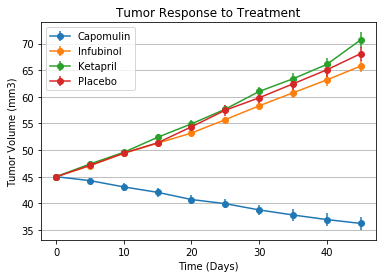

In [6]:
# Generate the Plot (with Error Bars)
x = mean_pivot.index

plt.errorbar(x, mean_pivot["Capomulin"], yerr= standard_error_pivot["Capomulin"], marker = "o")

plt.errorbar(x, mean_pivot["Infubinol"], yerr= standard_error_pivot["Infubinol"], marker = "o")

plt.errorbar(x, mean_pivot["Ketapril"], yerr= standard_error_pivot["Ketapril"], marker = "o")

plt.errorbar(x, mean_pivot["Placebo"], yerr= standard_error_pivot["Placebo"], marker = "o")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

plt.grid(axis="y")

# Save the Figure

plt.savefig("Tumor Response.png")


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = combined_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_site_df = pd.DataFrame(met_site).reset_index()

# Preview DataFrame
met_site_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_se = combined_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame

met_se_df = pd.DataFrame(met_se).reset_index()

# Preview DataFrame

met_se_df.head()

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = met_site_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
se_pivot = met_se_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_pivot.head()
se_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


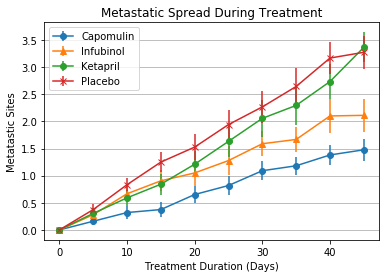

In [17]:
# Generate the Plot (with Error Bars)

x = met_pivot.index

plt.errorbar(x, met_pivot["Capomulin"], yerr= se_pivot["Capomulin"], marker = "o")

plt.errorbar(x, met_pivot["Infubinol"], yerr= se_pivot["Infubinol"], marker = "^")

plt.errorbar(x, met_pivot["Ketapril"], yerr= se_pivot["Ketapril"], marker = "o")

plt.errorbar(x, met_pivot["Placebo"], yerr= se_pivot["Placebo"], marker = "x")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metatastic Sites")

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

plt.grid(axis="y")

# Save the Figure

plt.savefig("Tumor Spread.png")

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = combined_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count}).reset_index()


# Preview DataFrame
mice_count_df.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames

count_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview that Reformatting worked
count_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


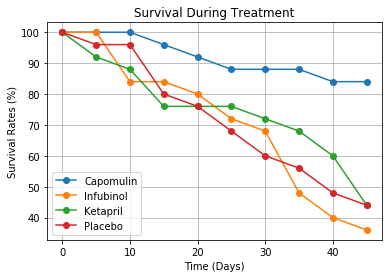

In [23]:
# Generate the Plot (Accounting for percentages)

plt.plot(count_pivot["Capomulin"]/25 * 100, marker="o")
plt.plot(count_pivot["Infubinol"]/25 * 100, marker="o")
plt.plot(count_pivot["Ketapril"]/25 * 100, marker="o")
plt.plot(count_pivot["Placebo"]/25 * 100, marker="o")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

plt.grid()

#save figure 

plt.savefig("Mice Survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug

tumor_change = (mean_pivot.iloc[-1] - mean_pivot.iloc[0])/mean_pivot.iloc[0] * 100
tumor_change

# Display the data to confirm

tumor_change_df = pd.DataFrame(tumor_change).reset_index()
tumor_change_df

,Drug,0
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [25]:
tumor_sem = (standard_error_pivot.iloc[-1] - standard_error_pivot.iloc[0])/standard_error_pivot.iloc[0] * 100

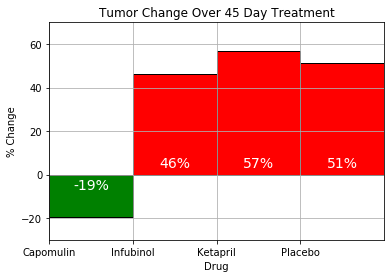

In [63]:
# Store all Relevant Percent Changes into a Tuple
cap_change = tumor_change["Capomulin"]
inf_change = tumor_change["Infubinol"]
ket_change = tumor_change["Ketapril"]
plac_change = tumor_change["Placebo"]

# Splice the data between passing and failing drugs

min_change = tumor_change.min()
max_change = tumor_change.max()

axis = max_change - min_change

bar1 = plt.bar(0, cap_change, color = "green", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar2 = plt.bar(1, inf_change, color = "red", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar3 = plt.bar(2, ket_change, color= "red", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar4 = plt.bar(3, plac_change, color= "red", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)

# Orient widths. Add labels, tick marks, etc
plt.grid()

plt.xticks(np.arange(4), ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
plt.xlim(0, 4)
plt.ylim(-30, 70)

# add plot labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Change")

# Use functions to label the percentages of changes

def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)
autolabel(bar1)
        
def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)


# Call functions to implement the function calls

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

# Save the Figure
plt.savefig("Summary Chart")

# Show the Figure
plt.show()

Conclusions: 

Across the board, Capomulin is the most effective drug. The tumor decreased by 19% during the course of the 45 day treatment period. It dampened the metastatic spread of the tumor, and tumor volume also decreased. The other three drugs - Infubinol, Ketapril, and the placebo - did not work as well. They performed similarly, and the tumor volume and metastatic spread increased.  